In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
import time

%matplotlib inline

In [2]:
from sklearn.utils import shuffle
from PIL import Image 
IMG_SIZE = 128
SEED = 42

In [3]:
train_path = "./data/train/train/"
valid_path = "./data/valid/"
test_path = "./data/test/"

In [4]:
from os import listdir
from os.path import isfile, join
train_list = [f for f in listdir(train_path) if isfile(join(train_path, f))]
valid_list = [f for f in listdir(valid_path) if isfile(join(valid_path, f))]
test_list = [f for f in listdir(test_path) if isfile(join(test_path, f))]
train_list[0]


'cat.1000.jpg'

In [5]:
df_train_file = pd.DataFrame()
df_valid_file = pd.DataFrame()
df_test_file = pd.DataFrame()
df_train_file['file'] = train_list
df_valid_file['file'] = valid_list
df_test_file['file'] = test_list

In [6]:
def cat_dog_label(str):
    if str[0] == 'c':
        return 0
    else:
        return 1
    

In [7]:
df_train_file['label'] = df_train_file['file'].apply(cat_dog_label)
df_valid_file['label'] = df_valid_file['file'].apply(cat_dog_label)
df_train_file = shuffle(df_train_file, random_state = SEED)
df_valid_file = shuffle(df_valid_file, random_state = SEED)
df_valid_file.head()


,file,label
1860,dog.873.jpg,1
353,cat.416.jpg,0
1333,dog.399.jpg,1
905,cat.913.jpg,0
1289,dog.359.jpg,1


In [8]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
    

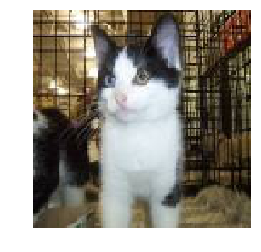

In [9]:

img = Image.open(train_path+df_train_file['file'][0])

#img.load()
cat_data = np.asarray(img.resize((IMG_SIZE, IMG_SIZE)), dtype="int32")
cat_data.shape
plot_color_image(cat_data)



In [10]:

def get_batcehs(X, y, idx, file_path, batch_size = 32):
    start_idx = idx
    end_idx = min(len(X), idx+batch_size)
    
    try :
        df_train_file.iloc[start_idx,:]
    except IndexError as e:
        print(e)
    
    img_batches = []
    for i in range(start_idx, end_idx):
        img = Image.open(file_path+X[i])
        img_data = np.asarray(img.resize((IMG_SIZE, IMG_SIZE)), dtype="int32")/255
        img_batches.append(img_data)
    
    return np.asarray(img_batches), np.reshape(y[start_idx:end_idx], (-1,1))
        
    



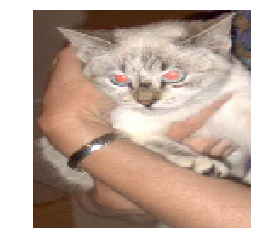

In [11]:
X = df_train_file['file'].values
y = df_train_file['label'].values

X_b, y_b = get_batcehs(X, y, 0, train_path, batch_size = 32)

plot_color_image(X_b[3]*255)



In [104]:
#n_sample, height, width, channels = X_train_reshaped.shape

height, width, channels = cat_data.shape
L_RATE = 0.001

conv1_features = 512
conv1_filters = 5
conv1_stride = 2
conv1_padding = "SAME"

pool1_features = conv1_features

conv2_features = 256
conv2_filters = 3
conv2_stride = 1
conv2_padding = "SAME"

pool2_features = conv2_features

conv3_features = 64
conv3_filters = 3
conv3_stride = 1
conv3_padding = "SAME"

pool3_features = conv3_features


n_fc1 = 64
n_dense = 32
n_output_layers = 1


tf.set_random_seed(SEED)
np.random.seed(SEED)
tf.reset_default_graph()


In [105]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
    y = tf.placeholder(tf.float32, shape=[None, n_output_layers], name="y")
    
with tf.name_scope("conv1"):
    conv1 = tf.layers.conv2d(X, filters=conv1_features, kernel_size=conv1_filters,
                         strides=conv1_stride, padding=conv1_padding,
                         activation=tf.nn.relu, name="conv1")
    
with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID", name='pool1')
    

'''
with tf.name_scope("conv2"):
    conv2 = tf.layers.conv2d(pool1, filters=conv2_features, kernel_size=conv2_filters,
                         strides=conv2_stride, padding=conv2_padding,
                         activation=tf.nn.relu, name="conv2")
    
with tf.name_scope("pool2"):
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID", name='pool2')


with tf.name_scope("conv3"):
    conv3 = tf.layers.conv2d(pool2, filters=conv3_features, kernel_size=conv3_filters,
                         strides=conv3_stride, padding=conv3_padding,
                         activation=tf.nn.relu, name="conv3")
    
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID", name='pool3')
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_features * 4 * 4])
   
'''

with tf.name_scope("fc1"):
    pool3_flat = tf.reshape(pool1, shape=[-1, pool1_features * 32 * 32])
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    dense = tf.layers.dense(fc1, n_dense, activation=tf.nn.relu, name="output")
#    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=tf.estimator.ModeKeys.TRAIN)
    logits = tf.layers.dense(inputs=dense, units=n_output_layers)
    

    


In [106]:
print (conv1.shape)
print (pool1.shape)
#print (conv2.shape)
#print (pool2.shape)
#print (conv3.shape)
#print (pool3.shape)
print (fc1.shape)
print (dense.shape)
print (logits.shape)



(?, 64, 64, 512)
(?, 32, 32, 512)
(?, 64)
(?, 32)
(?, 1)


In [107]:

#with tf.name_scope('cost'):
with tf.device("/gpu:0"):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate = L_RATE).minimize(cost)

with tf.name_scope("eval"):
    #correct = tf.nn.in_top_k(logits, y, 1)
    correct_prediction = tf.sigmoid(logits)
#    accuracy = tf.reduce_mean([correct_prediction>0.5]-y)
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    
    

In [108]:
X_train = df_train_file['file'].values
y_train = df_train_file['label'].values

X_valid = df_valid_file['file'].values
y_valid = df_valid_file['label'].values


#X_valid_data, y_valid_label = get_batcehs(X_valid, y_valid, 0, valid_path, batch_size = len(X_valid))
#print (X_valid_data.shape, y_valid_label.shape)

Epoch 0: Time - 138.54 s Cost - 14.9473 Train Acc - 62.48 Test Acc - 65.50
Epoch 1: Time - 137.27 s Cost - 13.1252 Train Acc - 70.79 Test Acc - 71.20
Epoch 2: Time - 137.02 s Cost - 11.4378 Train Acc - 77.23 Test Acc - 71.80
Epoch 3: Time - 137.11 s Cost - 9.0927 Train Acc - 84.00 Test Acc - 69.60
Epoch 4: Time - 140.42 s Cost - 6.6259 Train Acc - 90.22 Test Acc - 68.45
Epoch 5: Time - 140.54 s Cost - 4.8769 Train Acc - 94.18 Test Acc - 66.85
Epoch 6: Time - 138.35 s Cost - 3.7762 Train Acc - 96.21 Test Acc - 68.65
Epoch 7: Time - 138.46 s Cost - 2.5516 Train Acc - 98.08 Test Acc - 67.00
Epoch 8: Time - 137.09 s Cost - 2.0588 Train Acc - 98.71 Test Acc - 66.95
Epoch 9: Time - 136.99 s Cost - 1.5054 Train Acc - 99.32 Test Acc - 65.55


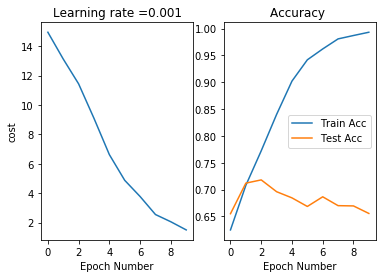

In [109]:
n_epochs = 10
batch_size = 32
m = len(X_train)

cost_list =[]
train_acc_list=[]
test_acc_list=[]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        epoch_cost = 0
        start_tm = time.time()
        
        for iteration in range(int(np.ceil(m / batch_size))):
          #  X_batch = X_train_reshaped[iteration*batch_size:(iteration+1)*batch_size]
          #  y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
            X_batch, y_batch = get_batcehs(X_train, y_train, iteration*batch_size, train_path, batch_size = batch_size)
            _, batch_cost = sess.run([optimizer, cost], feed_dict={X: X_batch, y: y_batch})
            epoch_cost += batch_cost / batch_size
            
            correct_pred = correct_prediction.eval({X: X_batch, y: y_batch})
            if iteration == 0 :
                epoch_pred = correct_pred
                epoch_y = y_batch
            else:
                epoch_pred = np.concatenate((epoch_pred, correct_pred), axis=0)
                epoch_y = np.concatenate((epoch_y, y_batch), axis=0)
        
        epoch_train_acc = np.mean(np.equal(np.array(epoch_pred >0.5).astype(int), np.array(epoch_y))) 
        # accuracy.eval({X: X_train, y: y_train})
        
        for valid_iter in range(int(len(X_valid)/100)):
            X_batch, y_batch = get_batcehs(X_valid, y_valid, valid_iter*100, valid_path, batch_size = 100)
            correct_pred = correct_prediction.eval({X: X_batch, y: y_batch})
            if valid_iter == 0 :
                epoch_pred = correct_pred
                epoch_y = y_batch
            else:
                epoch_pred = np.concatenate((epoch_pred, correct_pred), axis=0)
                epoch_y = np.concatenate((epoch_y, y_batch), axis=0)
            
        epoch_valid_acc = np.mean(np.equal(np.array(epoch_pred >0.5).astype(int), np.array(epoch_y)))    
        
        cost_list.append(epoch_cost)
        train_acc_list.append(epoch_train_acc)
        test_acc_list.append(epoch_valid_acc)
        
        end_tm = time.time()
        print ('Epoch %i: Time - %0.2f s Cost - %0.4f Train Acc - %0.2f Test Acc - %0.2f' 
               % (epoch, (end_tm-start_tm),  epoch_cost , 100*epoch_train_acc, 100*epoch_valid_acc) )
    
    
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.squeeze(cost_list))
ax[0].set_ylabel('cost')
ax[0].set_xlabel('Epoch Number')
ax[0].set_title("Learning rate =" + str(L_RATE))

ax[1].plot(train_acc_list, label="Train Acc")
ax[1].plot(test_acc_list, label="Test Acc")
ax[1].set_xlabel('Epoch Number')
ax[1].set_title("Accuracy ")
ax[1].legend()

plt.show()

